# Pymaceuticals Inc.
---

### Analysis
Summary
- Over the course of 45 days, 249 mice that were identified with SCC tumors and received treatment with a selected range of drug regimens provided varying results. After calculating the mean tumor volumes, the top five regimens that reduced the tumor average volume were: Infubinol, Ceftamin, Propriva, Capomulin, and Ramicane (40.2); while the number one regimen that left the tumor volume average at the highest was: Ketapril (55.2).
	- To support this, when looking through the bar plot between the number of observed mice timepoints, the top two performing drug regimens, Capomulin and Ramicane possess the highest number of observed timepoints by a sizeable margin (Capomulin leading ahead of Ramicane by a small margin).
- Pie plot showcasing the distribution of female versus male mice show that slightly more males have been undergoing treatment than females. Due to the test subjects having a close enough balance in males and females, the sex of the mouse should not affect the overall results of the treatments.
- In the box plot showcasing the distribution of the tumor volume of each treatment, there was an outlier detected in data for Infubinol that looked to perform just as well as the results for Capomulin.
- An examination between the mouse's weight and the average observed tumor volume for the entire Capomulin regimen was conducted, there was a relatively weak but positive correlation between both elements; the mouse's weight (g) scales with the average tumor volume (mm3).
 
Conclusions/Comparisons
- From what can be concluded, Capomulin is the best performing drug regimen based on its data results. While Ramicane possesses the better record in reducing the tumor volume (by a small margin), Capomulin performed better in preserving the mice’s health by the end of the 45-day timepoint. It can also be worth considering Infubinol's effectiveness given its outlier, but from its general performance, it would be highly suggested to not rely on the anomaly as it could have occurred based entirely on measurement errors or poor sampling. Overall, as it is in the best interest of the company, it can be said Capomulin is a great contender in treating SCC, but Ramicane is also a strong contender as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np    #added NumPy
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID'])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = mouse_metadata['Mouse ID'].count()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Filter to identify duplicate rows between Mouse ID and Timepoint
duplicate_data = mouse_data_complete[mouse_data_complete.duplicated(subset=
                                                                    ['Mouse ID', 'Timepoint'], keep=False)]
                                    #.duplicated function returns a boolean Series in search of duplicate rows in the DF
                                                                                #keep=false parameter marks all available dupes as true
duplicate_mice = duplicate_data['Mouse ID'].unique()

duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the DataFrame to get all data for the duplicate mouse ID
duplicate_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)]
                                #.isin function to check if Mouse ID is the same as g898

duplicate_mouse_data_df = pd.DataFrame(duplicate_mouse_data)

# Display all data for the duplicate mouse ID
duplicate_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_complete = mouse_data_complete.drop_duplicates(['Mouse ID'])
                                #.drop_duplicates function to remove duplicate rows based on Mouse ID
                                
clean_mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_mouse_data_complete["Mouse ID"].count()
clean_mice_number

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err_tumor_volume = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#DataFrame creation
summary_drug_regimen_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Std. Dev. Tumor Volume': std_dev_tumor_volume,
    'Std. Err. Tumor Volume': std_err_tumor_volume
})
summary_drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_drug_regimen_df_agg = mouse_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', median='median', var='var', std='std', sem='sem')

summary_drug_regimen_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Ketapril'),
 Text(3, 0, 'Naftisol'),
 Text(4, 0, 'Zoniferol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Stelasyn'),
 Text(7, 0, 'Infubinol'),
 Text(8, 0, 'Ceftamin'),
 Text(9, 0, 'Propriva')]

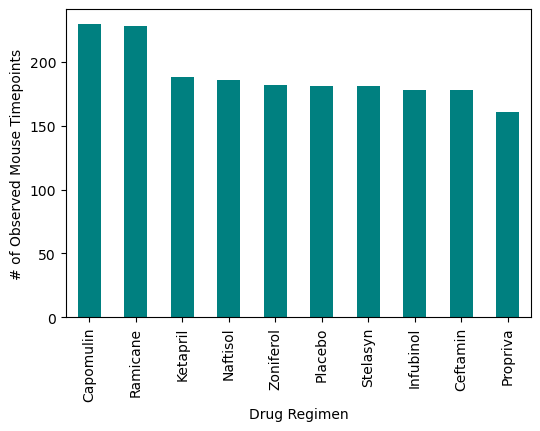

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_data = mouse_data_complete['Drug Regimen'].value_counts()
figure1 = regimen_data.plot(kind='bar', color='teal', figsize=(6, 4))
figure1.set_xlabel('Drug Regimen')
figure1.set_ylabel('# of Observed Mouse Timepoints')
figure1.set_xticklabels(regimen_data.index)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

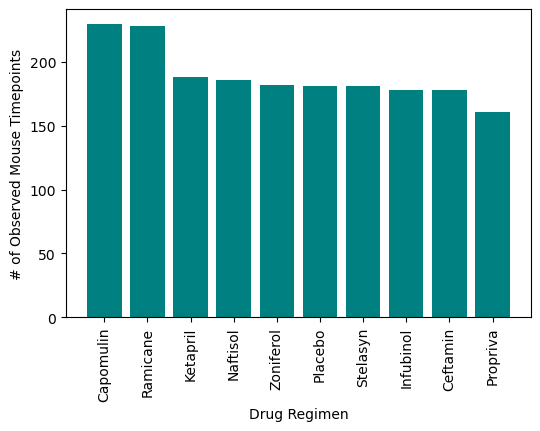

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_data = mouse_data_complete['Drug Regimen'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(regimen_data.index, regimen_data, color='teal')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

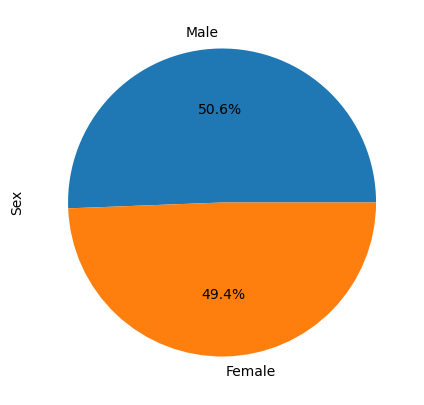

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
regimen_data = mouse_data_complete['Sex'].value_counts()
figure2 = regimen_data.plot(kind='pie', labels=regimen_data.index, figsize=(5, 5),
                            autopct='%1.01f%%', ylabel= 'Sex')


Text(0, 0.5, 'Sex')

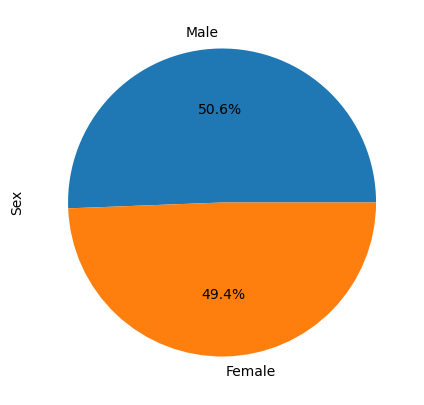

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
regimen_data = mouse_data_complete['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(regimen_data, labels=regimen_data.index, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_regimens = mouse_data_complete[mouse_data_complete['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
                                                            #.isin function to check if the list of regimens line up
final_tumor_volume = filtered_regimens.groupby(["Mouse ID", "Drug Regimen"]).last().reset_index()[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
                                                                #last() function will select the last row of the timepoint, which is also the maximum timepoint
final_tumor_volume

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Infubinol,45,67.973419
1,Infubinol,45,65.525743
2,Ceftamin,45,62.999356
3,Ramicane,45,38.407618
4,Ramicane,45,43.047543
...,...,...,...
95,Ceftamin,45,68.594745
96,Capomulin,45,31.896238
97,Ceftamin,45,64.729837
98,Ramicane,45,30.638696


In [13]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = filtered_regimens["Drug Regimen"].unique().tolist()

# Create an empty dictionary to fill with tumor volume data
tumor_vol_data = {}

# Calculate the IQR and determine potential outliers
quartiles = final_tumor_volume["Tumor Volume (mm3)"].quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    subset = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]    # add subset
    tumor_volumes = subset["Tumor Volume (mm3)"].tolist()
    tumor_vol_data[treatment] = tumor_volumes

# Determine outliers using upper and lower bounds
for treatment, volumes in tumor_vol_data.items():
    print(f"Treatment: {treatment}")
    print(f"Tumor Volumes: {volumes}")
    outliers = [vol for vol in volumes if (vol < lower_bound) or (vol > upper_bound)]
    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"No outliers found for {treatment}")

Treatment: Ramicane
Tumor Volumes: [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]
No outliers found for Ramicane
Treatment: Capomulin
Tumor Volumes: [38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]
No outliers found for Capomulin
Treatment: Infubinol
Tumor Volumes: [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55

[Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Capomulin'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

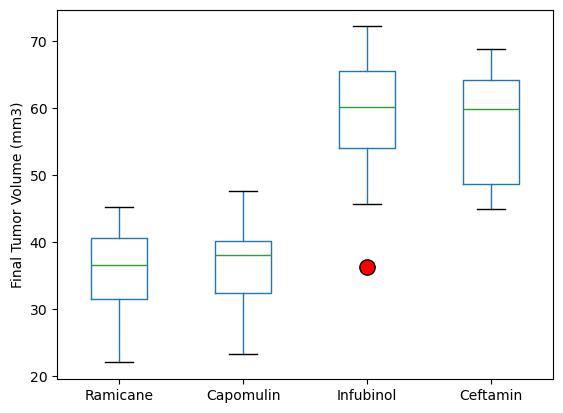

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = pd.DataFrame({treatment: tumor_vol_data[treatment] for treatment in treatments})

# Create a box plot with Pandas
fig, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Format properties, more so to make the outlier red and larger
box_format = dict(marker='o', markerfacecolor='r', markersize=11, linestyle='none')
df.boxplot(ax=ax1, flierprops=box_format, grid=False)
    #creates the box plot with set parameters and outlier formatting; removed grid format
ax1.set_xticklabels(treatments)
    #ordered: Ramicane, Capomulin, Infubinol, Ceftamin

## Line and Scatter Plots

In [80]:
mouse_data_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

Text(0, 0.5, 'Tumor Volume (mm3)')

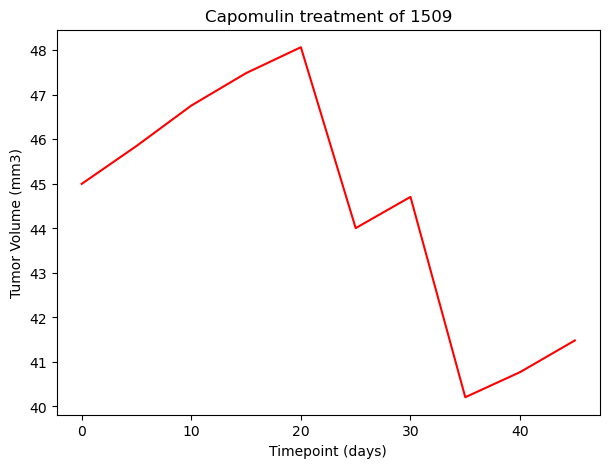

In [81]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Chose mouse 1509
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']
mouse_l509_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Create a line plot for tumor volume vs. time point for mouse l509
plt.figure(figsize=(7, 5))
plt.plot(mouse_l509_data['Timepoint'], mouse_l509_data['Tumor Volume (mm3)'], label='Mouse l509', color='r')
plt.title('Capomulin treatment of 1509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

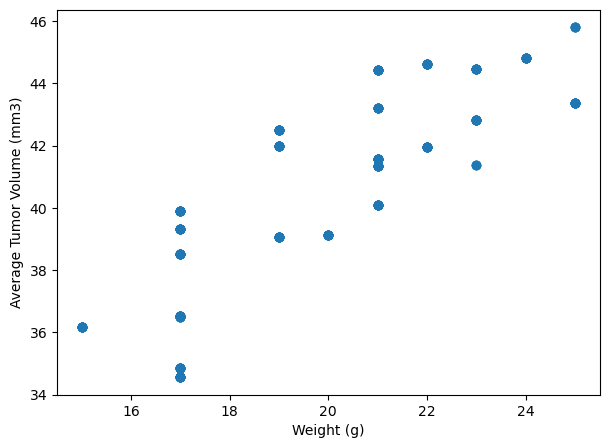

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume as a groupby with Mouse ID
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the original data to include mouse weight
merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Create scatter plot of mouse weight vs tumor volume average for Capomulin regimen
plt.figure(figsize=(7, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

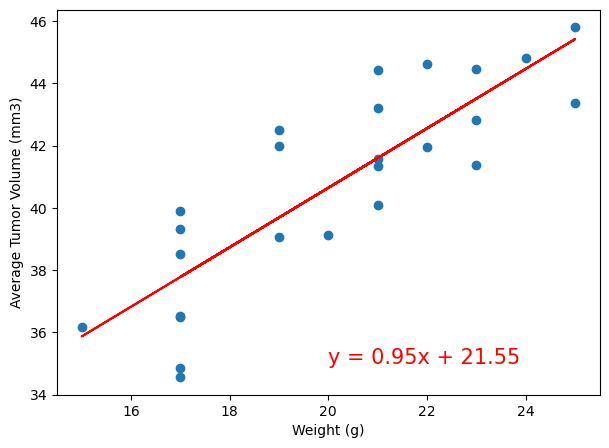

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#reshaped x-axis to be compaitable with line regression function
x_values = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().values.reshape(-1, 1)
x_values = x_values.flatten()   #flatten() helps reduce the array to a format suitable in calculating the correlation coefficient

#Average observed tumor volume already calculated prior, renaming variable for simplicity
y_values = avg_tumor_volume

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.flatten(), y_values)

#Coreelation coefficient calculations
correlation_coefficient = round(st.pearsonr(x_values, y_values)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

#Regression calculations
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot data like before with regression line + annotations
plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 35), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')